In [2]:
import calendar
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import os
from tabulate import tabulate

In [3]:
def process_clk(satellite_name,week):

    input_filename = f"gps_{week}.npz"

    if not os.path.exists(input_filename):
        raise FileNotFoundError(f"The file {input_filename} does not exist.")
    
    data = np.load(input_filename)
    
    satellite_names = data['satellite']
    year = data['yyyy']
    month = data['mm']
    day = data['dd']
    hour = data['hh']
    minutes = data['mi']
    second = data['ss']
    fin_clock_bias = data['clock_bias']
    ver = data['ver']
    files = data['files']
    
    matching_indices = [i for i, name in enumerate(satellite_names) if name.startswith(satellite_name)]

    matching_satellite_names = satellite_names[matching_indices]
    matching_year= year[matching_indices]
    matching_month= month[matching_indices]
    matching_day= day[matching_indices]
    matching_hour= hour[matching_indices]
    matching_minutes= minutes[matching_indices]
    matching_second= second[matching_indices]
    matching_fin_clock_bias= fin_clock_bias[matching_indices]
    matching_ver = ver[matching_indices]
    matching_files= files[matching_indices]
        
    output_filename = f"gps_{week}_{satellite_name}.npz"
    
    np.savez(output_filename, 
             satellite = matching_satellite_names, 
             yyyy = matching_year, 
             mm = matching_month, 
             dd = matching_day, 
             hh = matching_hour, 
             mi = matching_minutes, 
             ss = matching_second, 
             clock_bias_vals = matching_fin_clock_bias, 
             vers = matching_ver,
             filename = matching_files)
    
    print(f"Data has been saved to {output_filename}")

In [4]:
process_clk('G21',2035)

Data has been saved to gps_2035_G21.npz


In [5]:
broadcast = np.load('gps_2035_G21.npz')
broadcast.files

['satellite',
 'yyyy',
 'mm',
 'dd',
 'hh',
 'mi',
 'ss',
 'clock_bias_vals',
 'vers',
 'filename']

In [10]:
# Load the data
broadcast = np.load('gps_2035_G21.npz')

# Extract the arrays
satellite = broadcast['satellite']
yyyy = broadcast['yyyy']
mm = broadcast['mm']
dd = broadcast['dd']
hh = broadcast['hh']
mi = broadcast['mi']
ss = broadcast['ss']
clock_bias = broadcast['clock_bias_vals']
ver = broadcast['vers']
filepath = broadcast['filename']
 
# Combine date and time into datetime objects
epochs = [datetime(year, month, day, hour, minute, second)
          for year, month, day, hour, minute, second 
          in zip(yyyy, mm, dd, hh, mi, ss)]

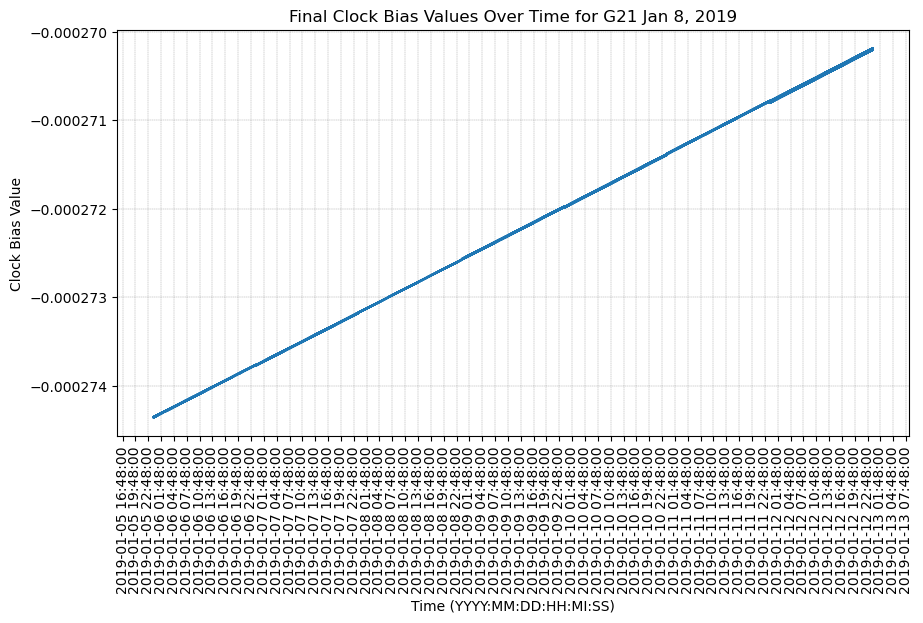

In [49]:
# Convert time strings to datetime objects
# time_datetimes = [datetime.strptime(ts, '%Y:%m:%d:%H:%M:%S') for ts in epochs]

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(epochs, clock_bias)
plt.xlabel('Time (YYYY:MM:DD:HH:MI:SS)')
plt.ylabel('Clock Bias Value')
# plt.ylim(-0.0002734,-0.0002722)
# plt.xlim(datetime(2019, 1, 8, 0, 0, 0) ,datetime(2019, 1, 9, 0, 0, 0))


plt.title('Final Clock Bias Values Over Time for G21 Jan 8, 2019')

# Format the x-axis to show dates correctly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=180))  # Set major ticks every hour

plt.tight_layout()
plt.grid(color='gray', linestyle='--', linewidth=0.25)
plt.xticks(rotation=90)
plt.show()

In [51]:
len(clock_bias)

61629